## Hello TensorFlow
- 测试TensorFlow是否安装成功
- 莫烦Python_tensorflow[博客](https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/)
- Youtube[视频](https://www.youtube.com/playlist?list=PLXO45tsB95cKI5AIlf5TxxFPzb-0zeVZ8)

In [1]:
import tensorflow as tf
hello = tf.constant('Hello TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello TensorFlow!'


- Tensorflow首先要定义神经网络结构，然后再把数据放入结构中去运算

## 入门小栗子

In [2]:
import tensorflow as tf
import numpy as np

# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

### create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

# loss
loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)  # 创建optimizer，学习率0.5
train = optimizer.minimize(loss)  # optimizer的目标是最小化loss

## init初始化变量
init = tf.global_variables_initializer()
### create tensorflow structure end ###

# 会话开始
sess = tf.Session()
sess.run(init)  # 真正初始化变量

for step in range(201):
    sess.run(train)  # 可以想象成TensorFlow只是生成了一张流图，只有run的时候才会输出图中的某一个节点
    if step%20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [ 0.30222175] [ 0.25906551]
20 [ 0.14307652] [ 0.27789474]
40 [ 0.11050152] [ 0.29461104]
60 [ 0.10256013] [ 0.29868624]
80 [ 0.10062414] [ 0.29967973]
100 [ 0.10015217] [ 0.29992193]
120 [ 0.1000371] [ 0.29998097]
140 [ 0.10000905] [ 0.29999536]
160 [ 0.10000221] [ 0.29999888]
180 [ 0.10000054] [ 0.29999974]
200 [ 0.10000014] [ 0.29999995]


## Session会话控制
- method1：
```
sess = tf.Session()
pass
sess.close()
```

- method2：`with tf.Session() as sess:`

## Variable变量
- 在 Tensorflow 中，定义了某字符串是变量，它才是变量，这一点是与 Python 所不同的。

In [3]:
import tensorflow as tf

state = tf.Variable(0, name='counter')
one = tf.constant(1)  # 定义常量

new_value = tf.add(state, one)  # new_value = state + 1
update = tf.assign(state, new_value)  # state = state + 1

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


## Placeholder传入值
- 简单的理解，当执行`Session.run()`时，想要传入参数值，则使用Placeholder

In [4]:
import tensorflow as tf

input1 = tf.placeholder(tf.float32)  # tensorflow中，数据type一般为float32
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: 7., input2: 10.}))

70.0


## 栗子 添加层 def add_layer()

In [9]:
import tensorflow as tf
def add_layer(inputs, in_size, out_size, activation_function=None):
    # 用正态分布初始化权值比全0好
    # Weights是一个in_zize*out_size的矩阵
    # 每一个输入神经元对应一个输出神经元都有一个weight
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    # biases不推荐为0
    # 每一个输出神经元对应一个biase
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 栗子 建造神经网络

In [10]:
import tensorflow as tf
import numpy as np

# create data
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]  # 将一维向量变成了矩阵，该矩阵只有一列
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)  # 加入noise
y_data = np.square(x_data) - 0.5 + noise  # y=x*x-0.5

# define placeholder for inputs to network
# None表示输入多少都可以，输入特征为一维
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

### 正式开始构建网络 ###
# 隐藏层
hid_layer = add_layer(xs, 1, 10, activation_function=tf.nn.relu)  # 输入层一个神经元，隐藏层10个神经元
# 输出层
out_layer = add_layer(hid_layer, 10, 1, activation_function=None)

# loss
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - out_layer),
                                   axis=1))  # axis=1, 按行相加

optimizer = tf.train.GradientDescentOptimizer(0.1)  # 学习率0.1
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()  # 变量初始化，必不可少
### 网络搭建完成 ###

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, feed_dict={xs: x_data, ys: y_data})
        if i%100 == 0:
            print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.198814
0.00907055
0.0073761
0.0063226
0.00543304
0.00479273
0.00445862
0.00420264
0.00401705
0.00380566


## 栗子 结果可视化
- 运行.py文件才能看到动图

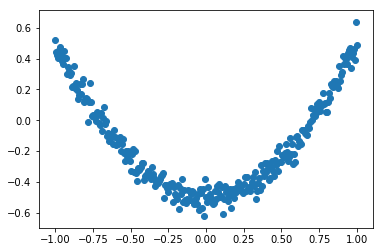

In [7]:
# plot the real data
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.show()

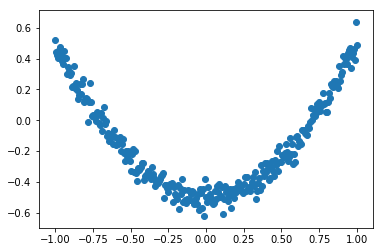

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()  # 继续画图
plt.show()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train, feed_dict={xs: x_data, ys: y_data})
        if i%50 == 0:
            try:
                ax.lines.remove(lines[0])  # 删除上一条线
            except Exception:
                pass
            prediction_value = sess.run(out_layer, feed_dict={xs: x_data})
            lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
            plt.pause(0.1)  # 暂停0.1秒

## Tensorboard可视化1——网络结构
- Win10下实现
  - 如果tensorflow安装在另一evn中，需要通过`activate tensorflow`先激活
  - 在teminal中使用cd进入tensorboard目录，如`C:\ProgramData\Anaconda2\envs\tensorflow\Lib\site-packages\tensorflow\tensorboard`
  - 将生成的logs文件夹放入tensorboard文件夹中
  - 在teminal中运行`tensorboard --logdir=log`
  - chrome浏览器打开`localhost:6006`
  - 另一种思路：
      - writer = tf.summary.FileWriter('f:/logs', sess.graph)
      - tensorboard --logdir=f://logs/

In [27]:
import tensorflow as tf
import numpy as np

# define placeholder for inputs to network
with tf.name_scope('inputs'):  # 形成一个大的图层'inputs'
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')
    
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):  # 整个层的名称
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)

        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)  # 激励函数自动添加name
        return outputs
    
###
hid_layer = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
out_layer = add_layer(hid_layer, 10, 1)
###

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - out_layer),
                                       axis=1))

optimizer = tf.train.GradientDescentOptimizer(0.1)  # 学习率0.1

with tf.name_scope('train'):
    train = optimizer.minimize(loss)

init = tf.global_variables_initializer()  # 变量初始化，必不可少
### 网络搭建完成 ###

with tf.Session() as sess:
    writer = tf.summary.FileWriter('logs/', sess.graph)
    sess.run(init)

## TensorFlow可视化2——trainLog

In [22]:
import tensorflow as tf
import numpy as np

# create data
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]  # 将一维向量变成了矩阵，该矩阵只有一列
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)  # 加入noise
y_data = np.square(x_data) - 0.5 + noise  # y=x*x-0.5

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

def add_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    layer_name = 'layer%s' % n_layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name = 'W')
            s1 = tf.summary.histogram(layer_name + '/weights', Weights)  # 显示Weights
        
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size]) + 0.1, name='b')
            s2 = tf.summary.histogram(layer_name + '/biases', biases)  # 显示biases

        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
            
        if activation_function is None:
            outputs=Wx_plus_b
        else:
            outputs= activation_function(Wx_plus_b)
        return outputs
            
###
hid_layer = add_layer(x_data, 1, 10, n_layer=1, activation_function=tf.nn.relu)
out_layer = add_layer(hid_layer, 10, 1, n_layer=2)
init = tf.global_variables_initializer()

###

# loss
with tf.name_scope('loss'):
    loss= tf.reduce_mean(tf.reduce_sum(tf.square(ys - out_layer), axis=1))
    tf.summary.scalar('LOSS', loss) # 显示loss

optimizer = tf.train.GradientDescentOptimizer(0.1)  # 学习率0.1
train = optimizer.minimize(loss)

sess = tf.Session()
merged = tf.summary.merge_all()  # 将所有的summary合并在一起
writer = tf.summary.FileWriter('trainLog/', sess.graph)
sess.run(init)

# train
for i in range(1000):
    sess.run(train, feed_dict={xs: x_data, ys: y_data})
    if i%50 == 0:  # 每隔50步记录一次结果
        pass
#         print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
#         rs = sess.run(merged, feed_dict={xs: x_data, ys: y_data})
#         writer.add_summary(rs, i)